In [1]:
import numpy as np
import matplotlib.pyplot as plt

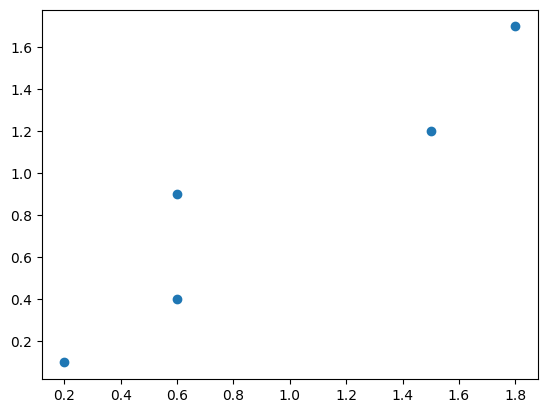

In [2]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
plt.scatter(x,y)
plt.show()

In [3]:
X_train, y_train = np.array([0.6, 1.8]), np.array([0.4, 1.7])
X_test, y_test = np.array([0.2, 0.6, 1.5]), np.array([0.1, 0.9, 1.2])
X_train.shape

(2,)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
X_train.resize(len(X_train), 1)
y_train.resize(len(y_train), 1)
X_test.resize(len(X_test), 1)
y_test.resize(len(y_test), 1)
X_train.shape

(2, 1)

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
coefs = modelo.coef_[0]
intercept = modelo.intercept_[0]
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')

y = -0.250 + 1.083x


In [7]:
modelo.coef_, modelo.intercept_

(array([[1.08333333]]), array([-0.25]))

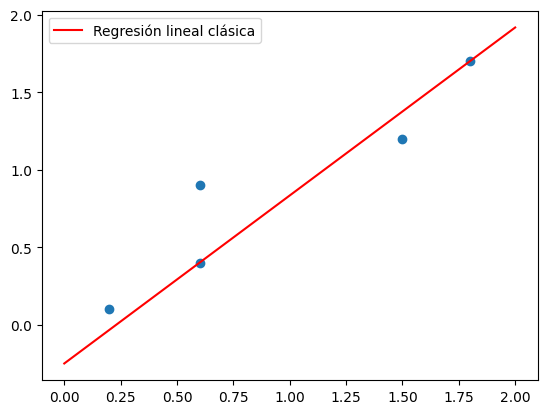

In [8]:
xx = np.linspace(0, 2, 2)
yy = modelo.predict(xx.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(xx, yy, c='r', label='Regresión lineal clásica')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error as mse
print(f'Error: {mse(y_test, modelo.predict(X_test))}')

Error: 0.09946759259259248


In [10]:
print(f'Error: {mse(y_train, modelo.predict(X_train))}')

Error: 2.465190328815662e-32


### Regularización

En general, cuando se realiza una regularización, se utiliza el error cuadrático medio (MSE) como función de costo, añadiendo un término que penaliza la complejidad del modelo:

$$J=MSE+\alpha C$$

C es la medida de complejidad del modelo. Dependiendo de cómo se mide la complejidad, se tienen distintos tipos de regularización. El hiperparámetro $\alpha$ indica qué tan importante es que el modelo sea simple en relación a qué tan importante es su rendimiento. Cuando se utiliza regularización, se reduce la complejidad del modelo al mismo tiempo que se minimiza la función de costo. Existen dos formas básicas: Lasso (L1) y Ridge (L2).

#### Regularización de Lasso (L1)

En esta regularización, la complejidad C se mide como la
media del valor absoluto de los coeficientes del modelo. Esto se puede aplicar a regresión lineal, polinómicas, regresión logística, redes neuronales, máquinas de soporte vectorial, etc. Matemáticamente se define como

$$C=\frac{1}{n}\sum_{i=1}^n|w_1|$$
con esto para el caso del MSE, la función de costo queda:
$$J=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2+\alpha \frac{1}{n}\sum_{i=1}^n|w_1|$$

#### Regularización de Ridge (L2)

En este tipo de regularización, la complejidad C se mide como
la media del cuadrado de los coeficientes del modelo. También se puede aplicar a diversas técnicas de aprendizaje automático. Matemáticamente se define como:

$$C = \frac{1}{2n} \sum_{i=1}^{n} w_1^2$$
y la función de costo:
$$J=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2+\alpha \frac{1}{2n}\sum_{i=1}^nw_1^2$$

### Regularización ElasticNet (L1 y L2)

Combina las regularizaciones (L1) y (L2); con el 
parámetro $r$ podemos indicar que importancia relativa tienen Lasso y Ridge, matemáticamente:
$$C=r\times \text{Lasso} + (1-r) \times \text{Ridge}$$

In [11]:
from sklearn.linear_model import Ridge
modelo2 = Ridge(alpha=0.3)
modelo2.fit(X_train, y_train)
coefs = modelo2.coef_[0]
intercept = modelo2.intercept_[0]
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')
print(f'Error: {mse(y_test, modelo2.predict(X_test))}')

y = 0.132 + 0.765x
Error: 0.04533737024221454


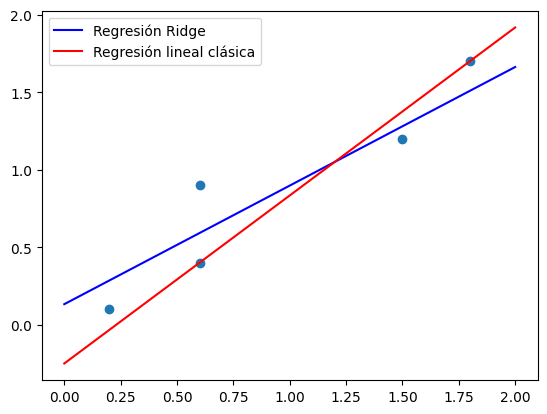

In [12]:
xx2 = np.linspace(0, 2, 2)
yy2 = modelo2.predict(xx.reshape(-1, 1))
plt.scatter(x, y)
plt.plot(xx2, yy2, c='b', label='Regresión Ridge')
plt.plot(xx, yy, c='r', label='Regresión lineal clásica')
plt.legend()
plt.show()

### **Tarea**

- Implementar el cálculo del estimador:
$$\hat{\mathbf{\beta}}=(\mathbf{X}^T\mathbf{X}+\alpha \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

In [13]:
def ridge_estimator_with_intercept(X, y, alpha):
    """
    Calcula el estimador de Ridge para regresión con intersección (bias).
    
    Parámetros:
    X : numpy.ndarray
        Matriz de diseño (de características) de tamaño (n_samples, n_features).
    y : numpy.ndarray
        Vector de observaciones de tamaño (n_samples,).
    alpha : float
        Parámetro de regularización (penalización).
    
    Retorna:
    beta_hat : numpy.ndarray
        Vector de coeficientes estimados, incluyendo el término de intersección.
    """
    # Añadir una columna de unos a X para el término de intersección
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]
    # Calcular el estimador de Ridge con intersección
    n_features = X_with_intercept.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0  # No regularizar el término de intersección (bias)
    beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept + alpha * I) @ X_with_intercept.T @ y
    
    return beta_hat

In [14]:
# Usar los mismos datos de antes
X_train = np.array([[0.6], [1.8]])  # Matriz de diseño (2 muestras, 1 característica)
y_train = np.array([0.4, 1.7])
alpha = 0.3  # Parámetro de regularización

# Calcular coeficientes (pendiente y término de intersección)
beta_hat = ridge_estimator_with_intercept(X_train, y_train, alpha)
print(f'y = {beta_hat[0]:.3f} + {beta_hat[1]:.3f}x')

y = 0.132 + 0.765x


In [15]:
# Calcular error de prueba
X_test = np.array([[0.2], [0.6], [1.5]])  # Matriz de diseño de prueba (3 muestras, 1 característica)
y_test = np.array([0.1, 0.9, 1.2])
y_pred = np.c_[np.ones(X_test.shape[0]), X_test] @ beta_hat
error = mse(y_test, y_pred)
print(f'Error: {error}')

Error: 0.04533737024221455


- Iterar el modelo de regresión Ridge variando el valor de $\alpha$ para obtener el mejor para el ejemplo con datos artificiales (de preferencia con la implementación propia).

In [16]:
alphas = np.linspace(0, 1, 100)
betas = np.array([ridge_estimator_with_intercept(X_train, y_train, alpha) for alpha in alphas])
y_preds = np.array([np.c_[np.ones(X_test.shape[0]), X_test] @ beta for beta in betas])
errors = np.array([mse(y_test, y_pred) for y_pred in y_preds])
# Find the best alpha
best_alpha = alphas[np.argmin(errors)]
print(f'Mejor alpha: {best_alpha}')
# Value of the mse for the best alpha
min_error = np.min(errors)
print(f'Error mínimo: {min_error}')

Mejor alpha: 0.32323232323232326
Error mínimo: 0.04520707034419504


- Revisar el uso de las regresiones Lasso y ElasticNet. Comparar con Ridge.

In [17]:
# Lasso
from sklearn.linear_model import Lasso
modelo3 = Lasso(alpha=0.3)
modelo3.fit(X_train, y_train)
coefs = modelo3.coef_
intercept = modelo3.intercept_
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')
print(f'Error: {mse(y_test, modelo3.predict(X_test))}')

y = 0.750 + 0.250x
Error: 0.16520833333333337


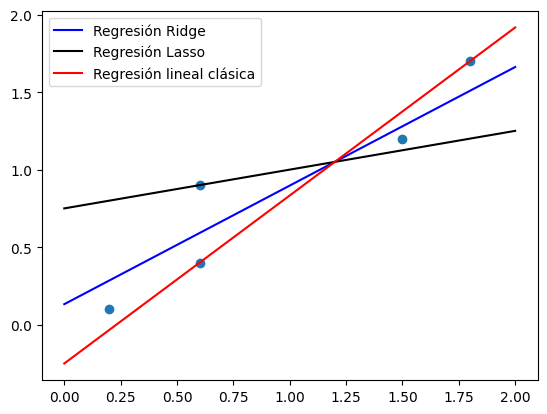

In [18]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
xx3 = np.linspace(0, 2, 2)
yy3 = modelo3.predict(xx.reshape(-1, 1))
xx2 = np.linspace(0, 2, 2)
yy2 = modelo2.predict(xx.reshape(-1, 1))
plt.plot(xx2, yy2, c='b', label='Regresión Ridge')
plt.scatter(x, y)
plt.plot(xx3, yy3, c='k', label='Regresión Lasso')
plt.plot(xx, yy, c='r', label='Regresión lineal clásica')
plt.legend()
plt.show()

In [19]:
# ElasticNet
from sklearn.linear_model import ElasticNet
modelo4 = ElasticNet(alpha=0.3, l1_ratio=0.5)
modelo4.fit(X_train, y_train)
coefs = modelo4.coef_
intercept = modelo4.intercept_
print(f'y = {intercept:.3f} + {coefs[0]:.3f}x')
print(f'Error: {mse(y_test, modelo4.predict(X_test))}')

y = 0.485 + 0.471x
Error: 0.0824769319492503


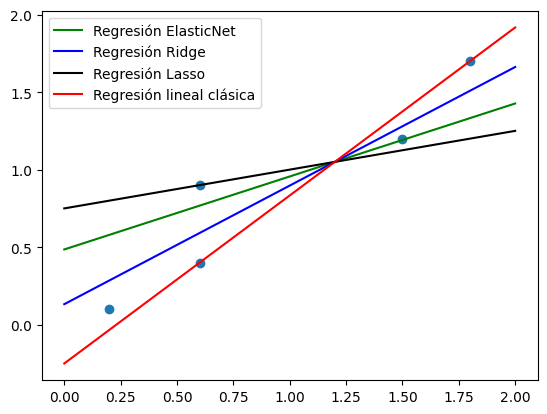

In [20]:
x = np.array([0.2,0.6,0.6,1.5,1.8])
y = np.array([0.1,0.4,0.9,1.2,1.7])
xx4 = np.linspace(0, 2, 2)
yy4 = modelo4.predict(xx.reshape(-1, 1))
xx3 = np.linspace(0, 2, 2)
yy3 = modelo3.predict(xx.reshape(-1, 1))
xx2 = np.linspace(0, 2, 2)
yy2 = modelo2.predict(xx.reshape(-1, 1))
plt.plot(xx4, yy4, c='g', label='Regresión ElasticNet')
plt.plot(xx2, yy2, c='b', label='Regresión Ridge')
plt.scatter(x, y)
plt.plot(xx3, yy3, c='k', label='Regresión Lasso')
plt.plot(xx, yy, c='r', label='Regresión lineal clásica')
plt.legend()
plt.show()

### Regresión polinomial

In [21]:
import pandas as pd

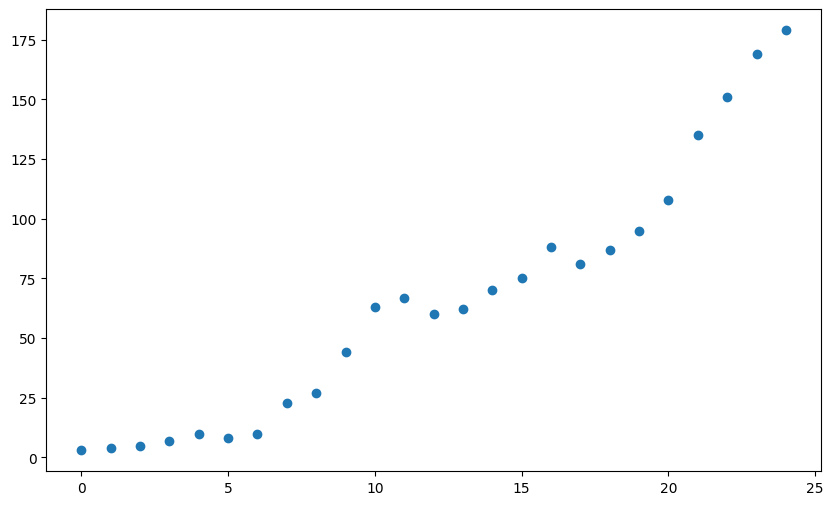

In [22]:
y = [3, 4, 5, 7, 10, 8, 10, 23, 27, 44, 63, 67, 60, 62, 70, 75, 88, 81,
     87, 95, 108, 135, 151, 169, 179]
x = np.arange(len(y))
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.show()

#### Características polinomiales

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Generar las nuevas características
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features

array([[  0.,   0.],
       [  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.],
       [  6.,  36.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 11., 121.],
       [ 12., 144.],
       [ 13., 169.],
       [ 14., 196.],
       [ 15., 225.],
       [ 16., 256.],
       [ 17., 289.],
       [ 18., 324.],
       [ 19., 361.],
       [ 20., 400.],
       [ 21., 441.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.]])

### Modelo lineal y polinomial

In [24]:
poly_linreg = LinearRegression()

In [25]:
# Ajuste y predicción
poly_linreg.fit(poly_features, y)
y_hat = poly_linreg.predict(poly_features)
poly_linreg.coef_, poly_linreg.intercept_

(array([1.73143813, 0.21727982]), np.float64(1.8758974358974498))

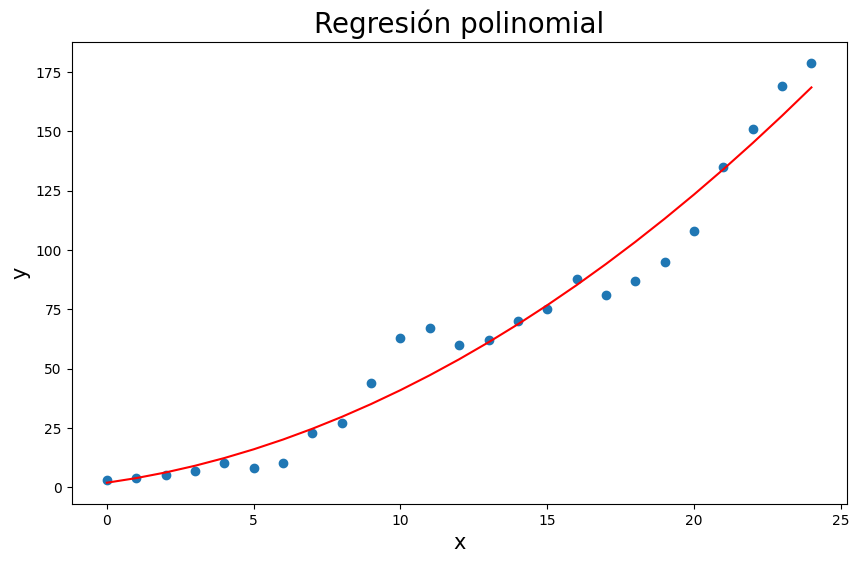

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')
plt.title('Regresión polinomial', size=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.show()

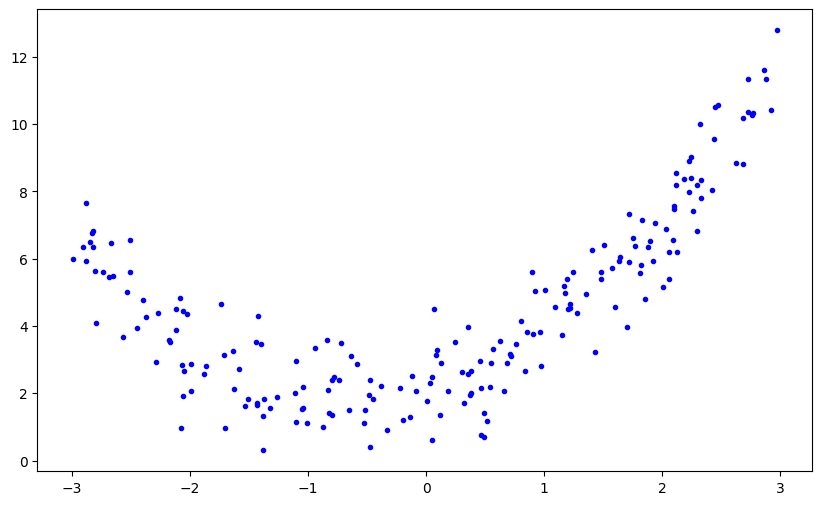

In [27]:
x = 6*np.random.rand(200, 1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200, 1)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b.')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
# Modelo lineal "puro"
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 : 0.1569492617203594
RMSE : 2.4067889155766524


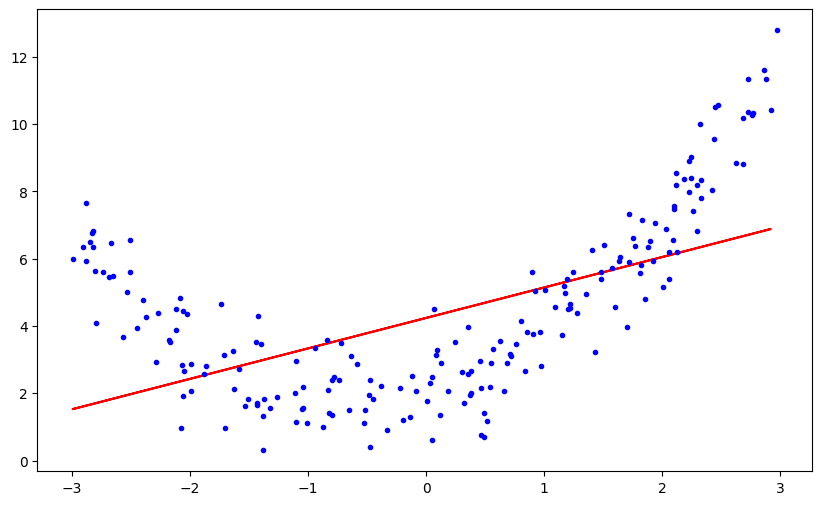

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(X_train, lr.predict(X_train), c='r')
plt.plot(x, y, 'b.')
plt.show()

In [32]:
# Polinomio de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo lineal para poly_reg
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 : 0.9000738355684377
RMSE : 0.8286111157847472


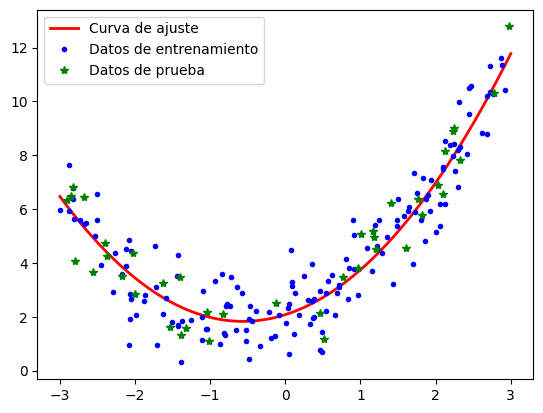

In [33]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)
plt.plot(x_new, y_new, 'r', linewidth=2, label='Curva de ajuste')
plt.plot(X_train, y_train, 'b.', label='Datos de entrenamiento')
plt.plot(X_test, y_test, 'g*', label='Datos de prueba')
plt.legend()
plt.show()

In [34]:
# Polinomio de grado 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modelo lineal para poly_reg
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')

# Si los resultados son similares, nos quedamos con el modelo más simple

R2 : 0.9004707112846565
RMSE : 0.8269639855756925


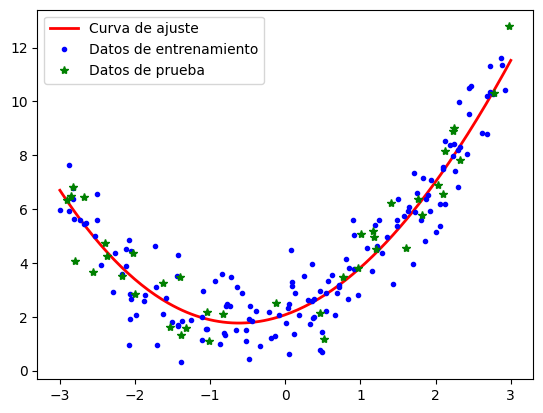

In [35]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)
plt.plot(x_new, y_new, 'r', linewidth=2, label='Curva de ajuste')
plt.plot(X_train, y_train, 'b.', label='Datos de entrenamiento')
plt.plot(X_test, y_test, 'g*', label='Datos de prueba')
plt.legend()
plt.show()

### Regresión polinomial, múltiples características

In [36]:
np.random.seed(1)
x1 = np.absolute(10 * np.random.randn(100, 1))
x2 = np.absolute(30 * np.random.randn(100, 1))
y = 2*x1**2 + 3*x1 + 2 + 20*np.random.randn(100, 1)

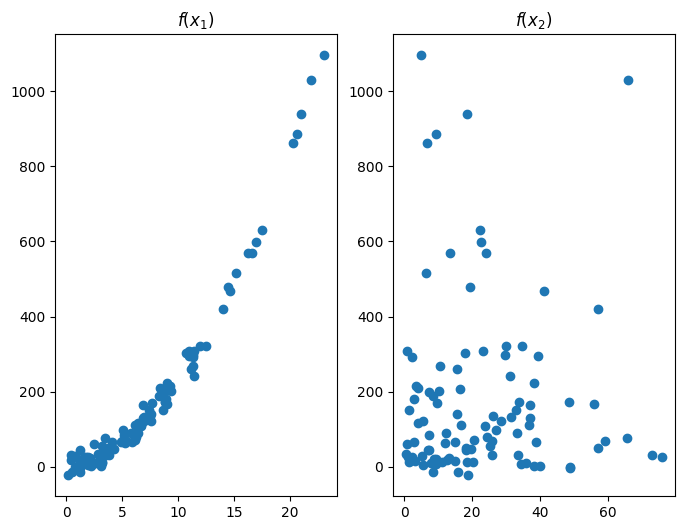

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].scatter(x1, y)
axes[1].scatter(x2, y)
axes[0].set_title('$f(x_1)$')
axes[1].set_title('$f(x_2)$')
plt.show()

In [38]:
df = pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()}, index=range(100))
df.head()

,x1,x2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269


In [39]:
# Características polinomiales y conjuntos de entrenamiento y prueba
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split    
X, y = df[['x1', 'x2']], df['y']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.3, random_state=42)

In [40]:
X_poly_features[0]

array([ 16.24345364,  13.41385694, 263.84978605, 217.88736335,
       179.9315581 ])

In [41]:
# Modelo lineal
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

In [42]:
# Ajuste y predicción
poly_reg.fit(X_train, y_train)
y_hat = poly_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
rmse

np.float64(20.93770783907868)

In [43]:
poly_reg.coef_

array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394])

In [44]:
# VS Modelo lineal puro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lin

np.float64(62.30248745387848)